In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy
%matplotlib inline

In [3]:
#imagePath = "box.jpg"
imagePath = "imagenes/Lena.png"

img0 = cv2.imread(imagePath)
print(img0.shape)
img = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)



(512, 512, 3)


# Bordes horizontales y verticales (Prewitt kernels)

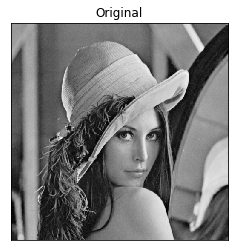

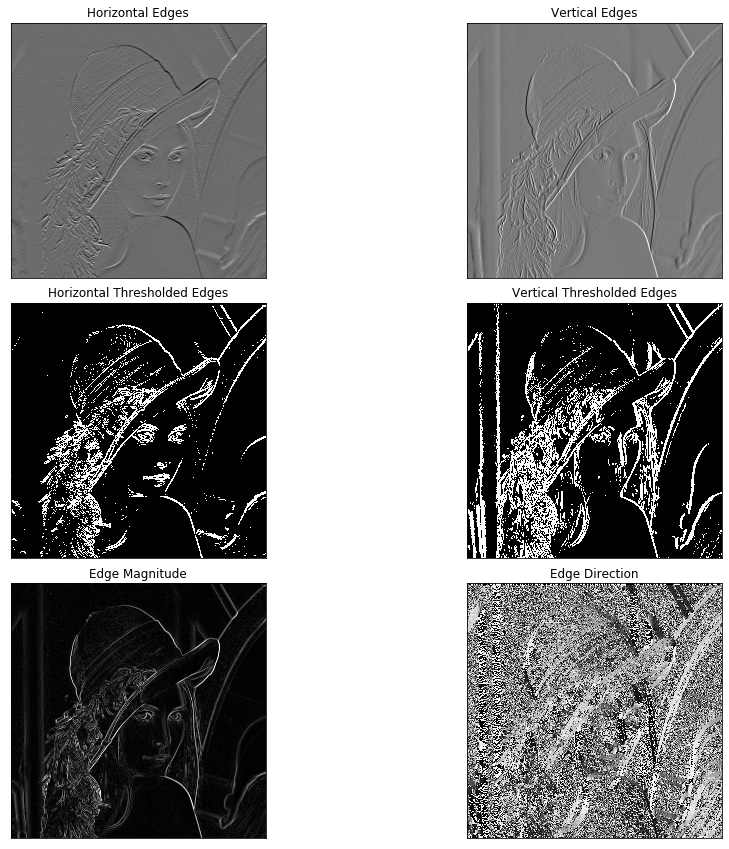

In [4]:
# 4.1.1 Detección de bordes horizontales y verticales
kv = np.array( [[1, 0, -1], [1, 0, -1], [1, 0, -1]] )
kh = np.array( [[1, 1, 1], [0, 0, 0], [-1, -1, -1]] )

edgev = cv2.filter2D(img.astype(np.float32),cv2.CV_32F,kv)
edgeh = cv2.filter2D(img.astype(np.float32),cv2.CV_32F,kh)

TH=40
edgesV = np.logical_or(edgev>TH, edgev<-TH) 
edgesH = np.logical_or(edgeh>TH, edgeh<-TH) 

edgeMagnitude = (edgev**2 + edgeh**2)**(1/2)
edgeDir = np.arctan(edgev/(edgeh+.000000001))

plt.figure()
plt.imshow(img, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()


f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(321),plt.imshow(edgeh, cmap='gray'),plt.title('Horizontal Edges')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(edgev, cmap='gray'),plt.title('Vertical Edges')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(edgesH, cmap='gray'),plt.title('Horizontal Thresholded Edges')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(edgesV, cmap='gray'),plt.title('Vertical Thresholded Edges')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(edgeMagnitude, cmap='gray'),plt.title('Edge Magnitude')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(edgeDir, cmap='gray'),plt.title('Edge Direction')
plt.xticks([]), plt.yticks([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
plt.show()


Los bordes tienen una dirección (la de máxima variación de la intensidad en la imagen), por tanto, responderán a los kernels horizontal y vertical con distinta intensidad. Obsérvese cómo en la imagen "vertical edges" se detecta a la izquierda una línea vertical, que pasa desapercibida con el kernel horizontal (en horizontal edges) y la magnitud total no es muy alta.

# Sobel edge detector

In [5]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

TH=1000
sobelV = np.logical_or(sobelx>TH, sobelx<-TH) 
sobelH = np.logical_or(sobely>TH, sobely<-TH) 


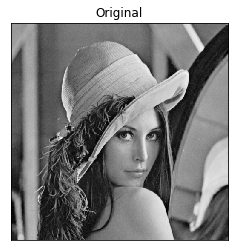

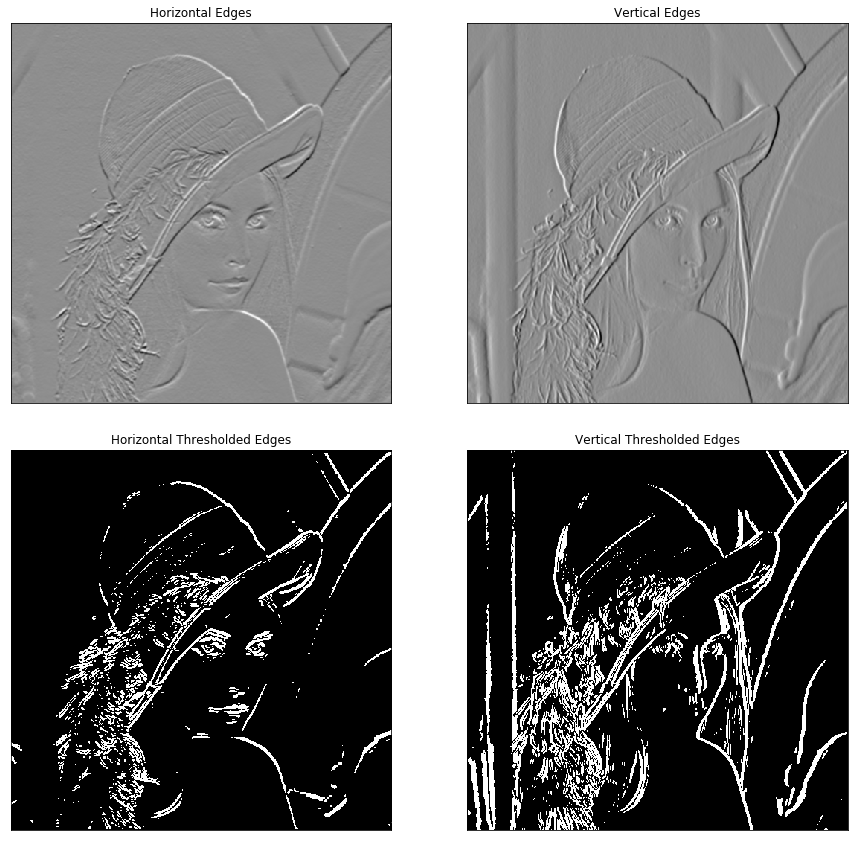

In [6]:
plt.figure()
plt.imshow(img, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.show()


f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(221),plt.imshow(sobely, cmap='gray'),plt.title('Horizontal Edges')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sobelx, cmap='gray'),plt.title('Vertical Edges')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(sobelH, cmap='gray'),plt.title('Horizontal Thresholded Edges')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(sobelV, cmap='gray'),plt.title('Vertical Thresholded Edges')
plt.xticks([]), plt.yticks([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
plt.show()


# Prewitt edge detector

In [7]:
#prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
img_prewittx = cv2.filter2D(img, -1, kernelx)
img_prewitty = cv2.filter2D(img, -1, kernely)


# Laplacian edge detector

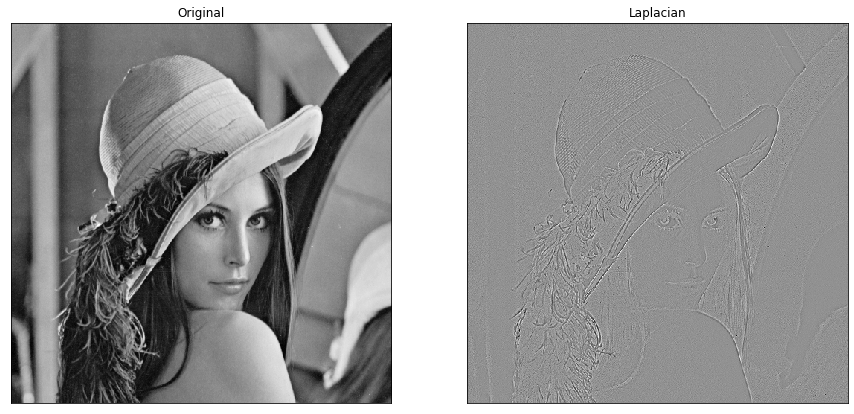

In [8]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)

f, axs = plt.subplots(2,2,figsize=(15,15))
plt.subplot(121),plt.imshow(img, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(laplacian,cmap = 'gray'), plt.title('Laplacian')
plt.xticks([]), plt.yticks([])

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.1)
plt.show()






Como se puede apreciar, los distintos detectores responden mejor a bordes con determinadas características.

Otras referencias:
https://www.meccanismocomplesso.org/en/opencv-python-image-edge-gradient-analysis/
